In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [1]:
%%capture
!pip install SpacyTextBlob
!pip3 install spacymoji==2.0.0
!pip3 uninstall spacy -y
!pip3 install spacy==3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
submissions_json = "data/submissions_investing_20211126.json"

In [ ]:
from pathlib import Path
# read json
p = Path(submissions_json)

with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())



In [ ]:
list(data[0].keys())

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'post_hint',
 'preview',
 'pwls',
 'removed_by_category',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thumbnail',
 'title',
 'total_award

In [ ]:
len(data)

128379

In [ ]:
a = set([1, 2, 3,5])
b = set([2, 3, 4,10])

print(list(b-a)[0])

10


In [ ]:
cols = [
 'author', 
 'created_utc',  
 'id', 
'link_flair_text',
 'num_comments', 
 'score',
  'subreddit_subscribers',   
 'selftext', 
 'title', 'upvote_ratio'

]


df_data = []

for doc in data:
  #cols =list(doc.keys())
  #print(list(doc.keys()))
  #print(list(doc.values()))
  #df_data.append(list(doc.values()))
  #break
    if  doc.keys() >= set(cols):
        lst =  [doc['author'], doc['created_utc'],doc['id']
                ,doc[ 'link_flair_text'], 
                doc['num_comments'],doc[ 'score'],
                doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                doc['upvote_ratio']          
                ]
        df_data.append(lst)
    else:
      missing_keys = list(set(cols) - doc.keys())
      if (len(missing_keys) == 1) and (missing_keys[0] == 'selftext'):
        #print('selftext')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'upvote_ratio'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'link_flair_text'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                   doc['upvote_ratio']            
                  ]
        df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'upvote_ratio') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,doc[ 'link_flair_text'],
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']           
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 3) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          print(missing_keys)
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  0,doc['selftext'],doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 3) and (missing_keys[0] == 'selftext') and (missing_keys[1] == 'link_flair_text')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0           
                  ]
          df_data.append(lst)
      else:
        print(missing_keys)
        #print(doc) 
        #print(doc.values()) 
        

df = pd.DataFrame(data=df_data,columns=cols)
df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127768 entries, 0 to 127767
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   author                 127768 non-null  object 
 1   created_utc            127768 non-null  int64  
 2   id                     127768 non-null  object 
 3   link_flair_text        127765 non-null  object 
 4   num_comments           127768 non-null  int64  
 5   score                  127768 non-null  int64  
 6   subreddit_subscribers  127768 non-null  int64  
 7   selftext               127768 non-null  object 
 8   title                  127768 non-null  object 
 9   upvote_ratio           127768 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.7+ MB


In [ ]:
df.to_csv("data/investing_submissions_all.csv", sep=";")

In [ ]:
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
0,plszvlko,1637939870,r2po7v,NA,1,1,1955286,[removed],What do you use to invest?,1.0
1,eopif,1637937793,r2oynm,NA,1,1,1955263,[removed],Where does flow data providers get their data ...,1.0
2,VonDerBerg,1637935888,r2ob2e,NA,1,1,1955253,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0
3,AccountForFinance,1637935867,r2oaua,NA,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0
4,ascends-me,1637934997,r2o0ww,NA,1,1,1955247,[removed],how do you seek crypto guidance?,1.0


In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [ ]:
#set created_utc as index
#df.set_index('created_utc')

df.index = pd.DatetimeIndex(df.created_utc)


In [ ]:
df.tail()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,
2017-12-29 22:35:34,SolarSurfer7,2017-12-29 22:35:34,7mxl2u,NA,19,2,0,With all of the Canadian pot stocks going para...,Canadian Pot Market Cap Napkin Calcs,0.0
2017-12-29 21:14:45,koolkavi2,2017-12-29 21:14:45,7mx3f1,NA,0,1,0,I am relatively new to investing and have been...,What are US-domiciled funds?,0.0
2017-12-29 20:17:47,Bcrane0305,2017-12-29 20:17:47,7mwqss,NA,5,3,0,What would his job title be if it really exist...,Gordon Gekko-Wall street,0.0
2017-12-29 19:00:35,runawaytrainmaster,2017-12-29 19:00:35,7mw93s,NA,7,2,0,i have a unique situation with my home equity ...,dump savings into home equity before selling?,0.0
2017-12-29 18:43:47,IndexMyAss,2017-12-29 18:43:47,7mw58w,NA,4,16,0,My account shows that it takes 2 days for cash...,Why do options take only 1 day to settle where...,0.0


# 3. Exploratory Data Analysis

## 3.1. Number of submissions

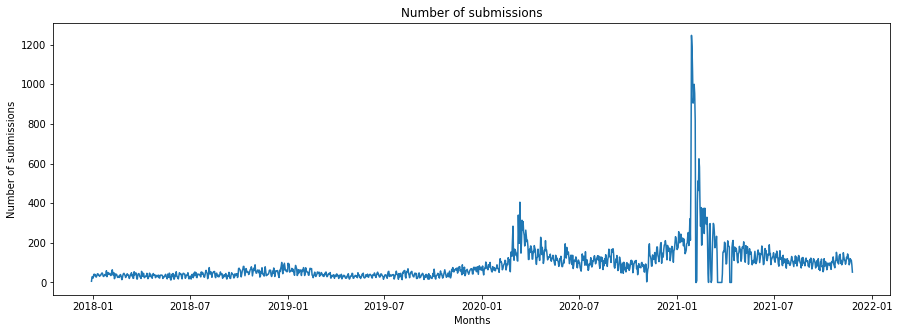

In [ ]:
df_submissions = df.groupby(pd.Grouper(freq="D"))["id"].count()
 

plt.figure(figsize=(15,5))
plt.plot(df_submissions)
plt.xlabel("Months")
plt.ylabel("Number of submissions")
plt.title("Number of submissions")
plt.show()

## 3.2. Number of subscribers

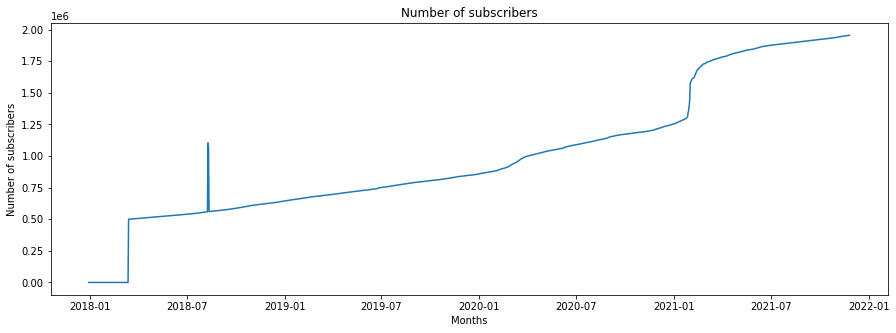

In [ ]:
df_subscribers = df.groupby(pd.Grouper(freq="D"))["subreddit_subscribers"].nth(-1)
# print(df_subscribers)

plt.figure(figsize=(15,5))
plt.plot(df_subscribers)
plt.xlabel("Months")
plt.ylabel("Number of subscribers")
plt.title("Number of subscribers")
plt.show()

## 3.3. Number of submissions by flair

In [ ]:
df_flairs = df.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False)
print(f"{len(df_flairs)} flair categories:\n{df_flairs.index.values}\n")
print(f"Top 15 flair count:\n{df_flairs.head(15)}")

5 flair categories:
['NA' 'Discussion' 'Help' 'News' 'Education']

Top 15 flair count:
link_flair_text
NA            125244
Discussion       890
Help             766
News             593
Education        272
Name: link_flair_text, dtype: int64


<AxesSubplot:xlabel='link_flair_text'>

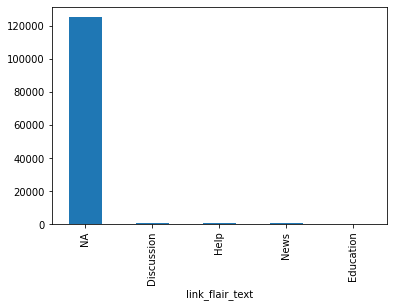

In [ ]:
df_flairs.plot.bar()

## 3.4. Top authors by submissions

In [ ]:
df_authors = df.groupby("author")["author"].count().sort_values(ascending=False)
print(f"Top 15 authors:\n{df_authors.head(15)}")


Top 15 authors:
author
[deleted]              3450
AutoModerator          1454
coolcomfort123          375
dailystockalert         323
NineteenEighty9         204
pipsdontsqueak          176
markyu007               169
COMPUTER1313            150
mrinalinimoneymaker     142
howtoreadspaghetti      132
wealthbuild-up          123
MrCrickets              120
etienner                112
StocksHighAlert         110
huongdinhant            106
Name: author, dtype: int64


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WSB/WSB_submissions_all.csv", sep=";")
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2018-12-31 15:05:18,861747,Leading_Breath,2018-12-31 15:05:18,ab7upy,NaN,417,1,454678,NaN,"""I don't give a shit about Tesla I just want t...",0.0
2018-12-31 14:45:20,861748,skitty2,2018-12-31 14:45:20,ab7oz6,NaN,8,1,454674,The whole next year will be green.,If today closes green,0.0
2018-12-31 14:40:30,861749,Googs84,2018-12-31 14:40:30,ab7nkw,Shitpost,0,1,454672,Happy New Year to all you degenerates includin...,Happy New Year Degenerates,0.0
2018-12-31 14:34:10,861750,neocoff,2018-12-31 14:34:10,ab7lu7,NaN,7,1,454672,NaN,Chip stocks set for worst quarter in a decade....,0.0
2018-12-31 14:29:50,861751,Brodmann,2018-12-31 14:29:50,ab7km1,Discussion,2,1,454671,NaN,Aphria down 7% premarket; Questions Surface if...,0.0


# 2. Find Sentiment

## 2.1. Intialize pipline

<!-- ![nlp_pipeline](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg) -->

In [7]:
# nlp = spacy.load("en_core_web_lg")

nlp = spacy.blank("en")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")
    nlp.rename_pipe("spacytextblob", "sentiment")
print(nlp.pipe_names)

['sentiment']


## 2.2. Find sentiment

In [ ]:
import re
df["title_polarity"] = 0.0
df["title_subjectivity"] = 0.0
df["body_polarity"] = 0.0
df["body_subjectivity"] = 0.0
df["polarity"] = 0.0
df["title_tokens"] = ""
df['title_tokens'] = df['title_tokens'].apply(list)
df["selftext_tokens"] ="" 
df['selftext_tokens'] = df['selftext_tokens'].apply(list)

def get_sentiment(title, body):
    title = re.sub(r"http\S+","",title) 
    body = re.sub(r"http\S+","",str(body)) 
    nlp_title = nlp(title)
    nlp_body = nlp(body)
    title_tokens = [token.text for token in nlp_title]
    body_tokens = [token.text for token in nlp_body]
    #ngrams = ngrams.append(list(textacy.extract.basics.ngrams(nlp_title, 3)))
    #print(pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
    #                  nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens]))
    return pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
                      nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens])

df[["title_polarity", "title_subjectivity", "body_polarity", "body_subjectivity","title_tokens","selftext_tokens"]] = df.apply(lambda row: get_sentiment(row["title"], row["selftext"]), axis=1)
df["polarity"] = (df["title_polarity"] + df["body_polarity"])
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens
created_utc,,,,,,,,,,,,,,,,,
2021-11-26 15:17:50,plszvlko,2021-11-26 15:17:50,r2po7v,NA,1,1,1955286,[removed],What do you use to invest?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[What, do, you, use, to, invest, ?]","[[, removed, ]]"
2021-11-26 14:43:13,eopif,2021-11-26 14:43:13,r2oynm,NA,1,1,1955263,[removed],Where does flow data providers get their data ...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, does, flow, data, providers, get, thei...","[[, removed, ]]"
2021-11-26 14:11:28,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NA,1,1,1955253,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant, ., Approvals, ., Lift,...","[So, the, markets, are, tanking, on, new, vari..."
2021-11-26 14:11:07,AccountForFinance,2021-11-26 14:11:07,r2oaua,NA,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Need, Advice, re, %, Allocation, to, Stocks, ...","[[, removed, ]]"
2021-11-26 13:56:37,ascends-me,2021-11-26 13:56:37,r2o0ww,NA,1,1,1955247,[removed],how do you seek crypto guidance?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[how, do, you, seek, crypto, guidance, ?]","[[, removed, ]]"


## 2.3. Group by day

In [ ]:
df_polarity = df.groupby(pd.Grouper(freq="D"))[["polarity"]].mean()
df_polarity = df_polarity.fillna(0)
display(df_polarity.head())

,polarity
created_utc,
2017-12-29,0.119427
2017-12-30,0.114057
2017-12-31,0.111098
2018-01-01,0.248178
2018-01-02,0.151106


##  choice of words, n-grams/phrases, ticker extraction

In [4]:
df = pd.read_csv("data/investing_submissions_all.csv", sep=";")

C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
%%capture
!pip install textacy

In [5]:
import textacy
bigrams_title = []
trigrams_title = []

def get_ngrams(title,n):
    nlp_title = nlp(str(title)) 
    f.write("%s\n" % list(textacy.extract.basics.ngrams(nlp_title, n, filter_stops=True, filter_punct=True, filter_nums=False)))

def get_ngrams_(title,n):
    nlp_title = nlp(str(title)) 
    return list(textacy.extract.basics.ngrams(nlp_title, n, filter_stops=True, filter_punct=True, filter_nums=False))


In [8]:
df['bigram']=df.apply(lambda row: get_ngrams_(row["title"],2), axis=1)
df['trigram']=df.apply(lambda row: get_ngrams_(row["title"],3), axis=1)
df['four-gram']=df.apply(lambda row: get_ngrams_(row["title"],4), axis=1)
df['five-gram']=df.apply(lambda row: get_ngrams_(row["title"],5), axis=1)

In [9]:
df.head()

,created_utc,SegmentID,author,created_utc.1,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,sbert_emb,bigram,trigram,four-gram,five-gram
0,2021-11-26 15:17:50,0,plszvlko,2021-11-26 15:17:50,r2po7v,NaN,1.0,1.0,1955286.0,[removed],What do you use to invest?,1.0,"[0.1719539761543274, -0.22599506378173828, -0....",[],"[(use, to, invest)]",[],[]
1,2021-11-26 14:43:13,1,eopif,2021-11-26 14:43:13,r2oynm,NaN,1.0,1.0,1955263.0,[removed],Where does flow data providers get their data ...,1.0,"[-0.19163201749324799, -0.6306818723678589, -0...","[(flow, data), (data, providers)]","[(flow, data, providers)]","[(providers, get, their, data)]","[(data, providers, get, their, data)]"
2,2021-11-26 14:11:28,2,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NaN,1.0,1.0,1955253.0,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0,"[-0.7088669538497925, 0.23540973663330078, 0.1...","[($, NVAX), (NVAX, new), (new, variant)]","[($, NVAX, new), (NVAX, new, variant)]","[($, NVAX, new, variant)]",[]
3,2021-11-26 14:11:07,3,AccountForFinance,2021-11-26 14:11:07,r2oaua,NaN,1.0,1.0,1955253.0,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0,"[-0.3507850468158722, -0.39994874596595764, -0...","[(Need, Advice), (ROTH, Backdoor), (Backdoor, ...","[(Allocation, to, Stocks), (Stocks, and, ROTH)...","[(Stocks, and, ROTH, Backdoor)]","[(Allocation, to, Stocks, and, ROTH), (Stocks,..."
4,2021-11-26 13:56:37,4,ascends-me,2021-11-26 13:56:37,r2o0ww,NaN,1.0,1.0,1955247.0,[removed],how do you seek crypto guidance?,1.0,"[-0.35977065563201904, 0.21836304664611816, -0...","[(seek, crypto), (crypto, guidance)]","[(seek, crypto, guidance)]",[],[]


In [10]:
df.to_csv("data/investing_submissions_all.csv", sep=";",index=False)

In [ ]:
with open('data/bigrams_title.txt', 'a', encoding="utf-8") as f: 
 df.apply(lambda row: get_ngrams(row["title"],2), axis=1)
    
with open('data/trigrams_title.txt', 'a', encoding="utf-8") as f:
 df.apply(lambda row: get_ngrams(row["title"],3), axis=1)

In [ ]:
    
with open('data/bigrams_selftext.txt', 'a', encoding="utf-8") as f:
 df.apply(lambda row: get_ngrams(row["selftext"],2), axis=1)
 
with open('data/trigrams_selftext.txt', 'a', encoding="utf-8") as f:
 df.apply(lambda row: get_ngrams(row["selftext"],3), axis=1)

## Frequency of N-grams

In [ ]:
# read a line from a file as a list of ngrams
# create a list of all ngrams
# calculate freq.
# wordcloud 

import ast
bigrams_title = []
with open('data/bigrams_title.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 


In [ ]:
import re
bigrams_title = []
for lst in lines:  
  for bigram in lst.split(','):    
    bigram=re.sub('[[]', '', bigram)
    bigram=re.sub('[]]', '', bigram)
    if bigram != '':      
      bigrams_title.append(bigram.lower())
print(bigrams_title[0:50])
  

C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


['flow data', ' data providers', '$nvax', ' nvax new', ' new variant', 'need advice', ' roth backdoor', ' backdoor conversion', 'seek crypto', ' crypto guidance', 'institutions loaning', 'institutions loading', 'gala crypto', ' punjabi language', 'bag x', ' x fantom', ' fantom bridge', ' bridge open', 'getting stronger', 'tech startup', ' startup investing', ' investing platform', ' black friday', 'china asks', ' asks didi', ' security fears', 'sec form', ' form 4', 'bored ape', ' ape alternative', ' alternative club', 'dow futures', ' futures plunge', ' plunge 800', ' 800 points', ' points amid', ' amid fears', ' new covid', ' covid variant', ' variant found', ' south africa', 'lifetime idea', ' elon musk', ' musk jeff', ' jeff bezos', ' bezos status', ' simple idea', ' level pinnacle', ' pinnacle idea', ' guy pleasedropcomment']


In [ ]:
count_freq = {}
for item in bigrams_title:
    item = item.strip()
    if item in count_freq:
        count_freq[item] +=1
    else:
        count_freq[item] = 1

In [ ]:
sorted_two_grams = sorted(count_freq.items(), key=lambda item: item[1], reverse = True)
print(sorted_two_grams[:100])

[('stock market', 1705), ('long term', 1619), ('roth ira', 1528), ('daily advice', 1125), ('advice thread', 1122), ('000', 848), ('s&amp;p 500', 800), ('index funds', 780), ('basic help', 746), ('advice questions', 745), ('real estate', 691), ('🚀🚀', 569), ('start investing', 552), ('index fund', 533), ('mutual funds', 499), ('need help', 479), ('best way', 468), ('$$', 445), ('capital gains', 421), ('year old', 417), ('mutual fund', 408), ('short term', 386), ('personal situation', 375), ('market cap', 315), ('$1', 315), ('$100', 313), ('interest rates', 303), ('good time', 292), ('brokerage account', 288), ('stock price', 282), ('need advice', 272), ('wall street', 272), ('td ameritrade', 270), ('new investor', 267), ('$10', 262), ('daily general', 260), ('general discussion', 260), ('free stock', 260), ('spitballin thread', 257), ('wash sale', 252), ('years old', 236), ('day trading', 233), ('term investment', 232), ('invest $', 232), ('market crash', 226), ('10 years', 224), ('good 

In [ ]:
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

#word_fd = nltk.FreqDist(filtered_sentence)
bigram_fd = nltk.FreqDist(nltk.bigrams(bigrams_title))



In [ ]:
bigram_fd.most_common(10)

[(('daily advice', ' advice thread'), 1122),
 ((' advice thread', ' basic help'), 745),
 ((' basic help', ' advice questions'), 745),
 ((' 🚀🚀', ' 🚀🚀'), 383),
 ((' advice thread', ' personal situation'), 374),
 ((' $$', ' $$'), 303),
 (('daily general', ' general discussion'), 259),
 ((' general discussion', ' spitballin thread'), 257),
 ((' long term', ' term investment'), 103),
 ((' term capital', ' capital gains'), 75)]

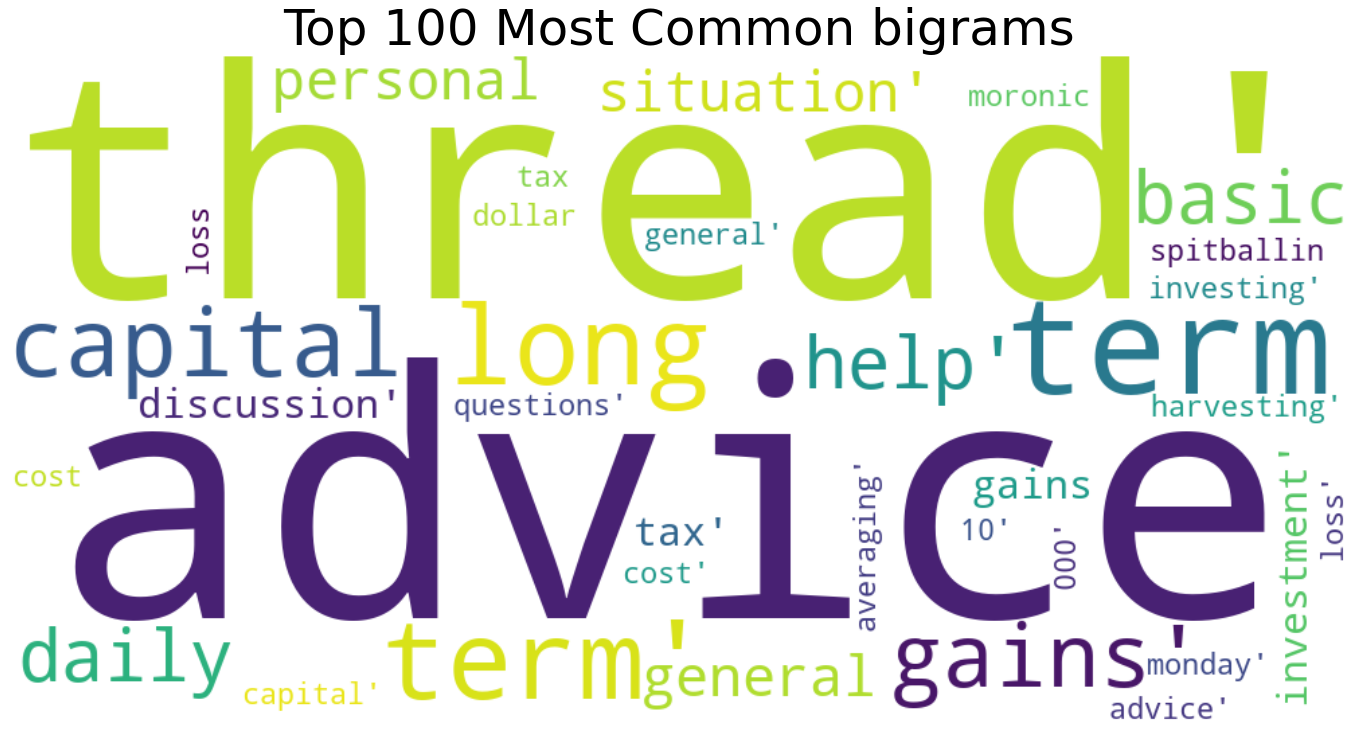

In [ ]:
mostcommon = bigram_fd.most_common(20)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common bigrams', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
with open('data/trigrams_title.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 

trigrams_title = []
for lst in lines:  
  for trigram in lst.split(','):    
    trigram=re.sub('[[]', '', trigram)
    trigram=re.sub('[]]', '', trigram)
    if trigram != '':      
      trigrams_title.append(trigram.lower())
print(trigrams_title[0:50])

['use to invest', 'flow data providers', '$nvax new', ' nvax new variant', 'allocation to stocks', ' stocks and roth', ' roth backdoor conversion', 'seek crypto guidance', 'based on elv', ' elv or nlv', 'loaning out shares', ' shares after buying', 'based on elv', ' elv or nlv', 'stock to loan', 'crypto in punjabi', 'bag x fantom', ' x fantom bridge', ' fantom bridge open', 'yes', '#ezycoin is coming', ' ezycoin was rising', ' rising and shining', ' shining this fire', ' fire is getting', ' steel in dip', 'tech startup investing', ' startup investing platform', 'china asks didi', ' didi to delist', ' delist from u.s.', ' u.s. on security', 'questions about sec', ' sec form 4', 'timing the market', ' market as opposed', ' opposed to buying', 'bored ape alternative', ' ape alternative club', 'dow futures plunge', ' futures plunge 800', ' plunge 800 points', ' 800 points amid', ' points amid fears', ' fears of new', ' new covid variant', ' covid variant found', ' found in south', 'elon mu

In [ ]:
count_freq_trigrams = {}
for item in trigrams_title:
    item = item.strip()
    if item in count_freq_trigrams:
        count_freq_trigrams[item] +=1
    else:
        count_freq_trigrams[item] = 1

In [ ]:
sorted_tri_grams = sorted(count_freq_trigrams.items(), key=lambda item: item[1], reverse = True)
print(sorted_tri_grams[:100])

[('daily advice thread', 1121), ('help or advice', 745), ('new to investing', 549), ('000', 435), ('🚀🚀🚀', 396), ('$$$', 313), ('daily general discussion', 258), ('discussion and spitballin', 256), ('time to buy', 245), ('want to invest', 212), ('way to invest', 208), ('looking for advice', 175), ('long term investment', 160), ('help me understand', 158), ('want to start', 141), ('time to invest', 134), ('capital gains tax', 132), ('looking to invest', 132), ('investing in stocks', 125), ('buy and hold', 125), ('long term investing', 115), ('stocks to buy', 114), ('thoughts on $', 101), ('rate my portfolio', 90), ('dollar cost averaging', 90), ('buy the dip', 85), ('1', 81), ('chance to ask', 81), ('s&amp;p 500 index', 80), ('need some advice', 79), ('timing the market', 78), ('term capital gains', 77), ('invest in stocks', 75), ('need to know', 74), ('stocks to invest', 73), ('real estate investing', 70), ('tax loss harvesting', 69), ('need some help', 69), ('want to learn', 68), ('10'

In [ ]:
trigram_fd = nltk.FreqDist(nltk.trigrams(trigrams_title))
trigram_fd.most_common(10)

[(('daily general discussion',
   ' discussion and spitballin',
   'daily advice thread'),
  244),
 ((' discussion and spitballin', 'daily advice thread', ' help or advice'),
  244),
 ((' 🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 212),
 ((' $$$', ' $$$', ' $$$'), 143),
 ((' 🍀🍀🍀', ' 🍀🍀🍀', ' 🍀🍀🍀'), 54),
 ((' 👍🏾👍', ' 🏾👍🏾', ' 👍🏾👍'), 48),
 ((' 🏾👍🏾', ' 👍🏾👍', ' 🏾👍🏾'), 48),
 (('chance to ask', ' questions without fear', ' fear of harassment'), 42),
 (('chance to ask', ' embarrassed to ask', ' ask in real'), 37),
 (('daily advice thread', 'chance to ask', ' questions without fear'), 35)]

## Extract Tickers 

In [ ]:
nasdaq_stocks = pd.read_csv("data/nasdaq.csv", sep=",")
nasdaq_stocks_symbols = nasdaq_stocks["Symbol"].tolist()

In [ ]:
# Function to find stocks in a text given stock list
regex = re.compile("[^a-zA-Z ]")
ticker_set = set(nasdaq_stocks_symbols)


def calculate_mentioned_stocks(title, body=""):
    content = regex.sub("", str(title) + " " + str(body)).split(" ")
    content = set(content)
    tickers = str(list(ticker_set & content))    
    return pd.Series([tickers])

def sanitize_column(column):
    column = column.replace("[],", "").replace("[]", "").replace("],[", ",")
    return column

In [ ]:
df[["tickers"]] = df.apply(lambda x: calculate_mentioned_stocks(x["title"],x["selftext"]), axis=1)


In [ ]:
df.head(10)

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
created_utc,,,,,,,,,,,,,,,,,,
2021-11-26 15:17:50,plszvlko,2021-11-26 15:17:50,r2po7v,NA,1,1,1955286,[removed],What do you use to invest?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[What, do, you, use, to, invest, ?]","[[, removed, ]]",[]
2021-11-26 14:43:13,eopif,2021-11-26 14:43:13,r2oynm,NA,1,1,1955263,[removed],Where does flow data providers get their data ...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, does, flow, data, providers, get, thei...","[[, removed, ]]",[]
2021-11-26 14:11:28,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NA,1,1,1955253,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant, ., Approvals, ., Lift,...","[So, the, markets, are, tanking, on, new, vari...","['YOU', 'UK', 'WE', 'NVAX', 'NOW', 'ARE', 'AN'..."
2021-11-26 14:11:07,AccountForFinance,2021-11-26 14:11:07,r2oaua,NA,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Need, Advice, re, %, Allocation, to, Stocks, ...","[[, removed, ]]",[]
2021-11-26 13:56:37,ascends-me,2021-11-26 13:56:37,r2o0ww,NA,1,1,1955247,[removed],how do you seek crypto guidance?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[how, do, you, seek, crypto, guidance, ?]","[[, removed, ]]",[]
2021-11-26 13:41:00,marqix,2021-11-26 13:41:00,r2nqtj,NA,1,1,1955246,[removed],Margin Call: Based on ELV or NLV?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Margin, Call, :, Based, on, ELV, or, NLV, ?]","[[, removed, ]]",[]
2021-11-26 13:36:12,dbh2,2021-11-26 13:36:12,r2nnar,NA,1,1,1955245,[removed],ELI5: institutions loaning out shares after bu...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[ELI5, :, institutions, loaning, out, shares, ...","[[, removed, ]]",[]
2021-11-26 13:35:18,marqix,2021-11-26 13:35:18,r2nmp6,NA,1,1,1955245,[removed],Margin Call: Based on ELV or NLV?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Margin, Call, :, Based, on, ELV, or, NLV, ?]","[[, removed, ]]",[]
2021-11-26 13:32:57,dbh2,2021-11-26 13:32:57,r2nl1o,NA,1,1,1955246,[removed],ELI5: Institutions loading up on a stock to lo...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[ELI5, :, Institutions, loading, up, on, a, st...","[[, removed, ]]",[]


In [ ]:
df["tickers"] = df["tickers"].apply(sanitize_column)

In [ ]:
df.head(10)

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
created_utc,,,,,,,,,,,,,,,,,,
2021-11-26 15:17:50,plszvlko,2021-11-26 15:17:50,r2po7v,NA,1,1,1955286,[removed],What do you use to invest?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[What, do, you, use, to, invest, ?]","[[, removed, ]]",
2021-11-26 14:43:13,eopif,2021-11-26 14:43:13,r2oynm,NA,1,1,1955263,[removed],Where does flow data providers get their data ...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, does, flow, data, providers, get, thei...","[[, removed, ]]",
2021-11-26 14:11:28,VonDerBerg,2021-11-26 14:11:28,r2ob2e,NA,1,1,1955253,So the markets are tanking on new variant news...,$NVAX new variant. Approvals. Lift-off.,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant, ., Approvals, ., Lift,...","[So, the, markets, are, tanking, on, new, vari...","['YOU', 'UK', 'WE', 'NVAX', 'NOW', 'ARE', 'AN'..."
2021-11-26 14:11:07,AccountForFinance,2021-11-26 14:11:07,r2oaua,NA,1,1,1955253,[removed],Need Advice re % Allocation to Stocks and ROTH...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Need, Advice, re, %, Allocation, to, Stocks, ...","[[, removed, ]]",
2021-11-26 13:56:37,ascends-me,2021-11-26 13:56:37,r2o0ww,NA,1,1,1955247,[removed],how do you seek crypto guidance?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[how, do, you, seek, crypto, guidance, ?]","[[, removed, ]]",
2021-11-26 13:41:00,marqix,2021-11-26 13:41:00,r2nqtj,NA,1,1,1955246,[removed],Margin Call: Based on ELV or NLV?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Margin, Call, :, Based, on, ELV, or, NLV, ?]","[[, removed, ]]",
2021-11-26 13:36:12,dbh2,2021-11-26 13:36:12,r2nnar,NA,1,1,1955245,[removed],ELI5: institutions loaning out shares after bu...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[ELI5, :, institutions, loaning, out, shares, ...","[[, removed, ]]",
2021-11-26 13:35:18,marqix,2021-11-26 13:35:18,r2nmp6,NA,1,1,1955245,[removed],Margin Call: Based on ELV or NLV?,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Margin, Call, :, Based, on, ELV, or, NLV, ?]","[[, removed, ]]",
2021-11-26 13:32:57,dbh2,2021-11-26 13:32:57,r2nl1o,NA,1,1,1955246,[removed],ELI5: Institutions loading up on a stock to lo...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[ELI5, :, Institutions, loading, up, on, a, st...","[[, removed, ]]",


In [ ]:
df.to_csv("data/investing_submissions_features_tickers.csv", sep=";")